In [1]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.2.0

In [2]:
import sklearn
sklearn.__version__

'1.6.1'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data

In [4]:
df = pd.read_csv("housing.csv")

In [5]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# تعداد برای متغیرهایی که در خانه های مجاور اقیانوس امده
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


---
# Train and Test set 1
#### این نوع جدا کردن منظور ما نیست


In [10]:
def shuffle_and_split_df(df, test_ratio):
  np.random.seed(40)
  random_indices = np.random.permutation(len(df))
  test_set_size = int(len(df) * test_ratio)
  test_random_indices = random_indices[:test_set_size]
  train_random_indices = random_indices[test_set_size:]
  return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [11]:
train_set, test_set = shuffle_and_split_df(df, 0.2)

In [12]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN


In [13]:
from zlib import crc32

In [14]:
crc32(np.int64(10))

4108501921

In [15]:
def is_identifier_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio*2**32

In [16]:
def split_train_test_with_identifier_hash(df, test_ratio, identifier_column):
  identifiers = df[identifier_column]
  in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
  return df.loc[~in_test_set], df.loc[in_test_set]

In [17]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")

In [18]:
df_with_identifier = df
df_with_identifier["identifier"] = df["longitude"]*1000 + df["latitude"]
df_with_identifier

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [19]:
train_set, test_set = split_train_test_with_identifier_hash(df_with_identifier,
                                                            0.2,
                                                            "identifier")

In [20]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [21]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20
...,...,...,...,...,...,...,...,...,...,...,...
20616,-121.53,39.08,15.0,1810.0,441.0,1157.0,375.0,2.0469,55100.0,INLAND,-121490.92
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND,-121490.94
20618,-121.55,39.06,25.0,1332.0,247.0,726.0,226.0,2.2500,63400.0,INLAND,-121510.94
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND,-121410.74


---
# Train and Test set 
#### این روش مد نظر ماست


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=40)

In [24]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
9226,-120.04,36.93,11.0,3606.0,699.0,2074.0,644.0,2.6941,63300.0,INLAND,-120003.07
11826,-121.04,39.00,21.0,4059.0,730.0,1874.0,693.0,4.8051,174300.0,INLAND,-121001.00
4553,-118.24,34.06,33.0,390.0,199.0,435.0,193.0,1.1979,350000.0,<1H OCEAN,-118205.94
10787,-117.92,33.64,25.0,2224.0,580.0,985.0,516.0,3.1305,268800.0,<1H OCEAN,-117886.36
4104,-118.35,34.13,39.0,1610.0,278.0,511.0,278.0,4.3333,385900.0,<1H OCEAN,-118315.87
...,...,...,...,...,...,...,...,...,...,...,...
11532,-118.09,33.77,26.0,5359.0,1508.0,1829.0,1393.0,1.7675,61300.0,<1H OCEAN,-118056.23
16065,-122.48,37.75,49.0,2203.0,407.0,1052.0,405.0,4.4375,329200.0,NEAR BAY,-122442.25
14501,-117.23,32.86,16.0,1200.0,468.0,648.0,443.0,3.0450,100000.0,NEAR OCEAN,-117197.14
14555,-117.13,32.96,15.0,2267.0,292.0,1180.0,289.0,6.7120,240200.0,<1H OCEAN,-117097.04


In [25]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
6607,-118.14,34.18,47.0,3457.0,622.0,1700.0,579.0,3.5164,226500.0,<1H OCEAN,-118105.82
884,-121.97,37.54,31.0,1949.0,344.0,986.0,322.0,4.6349,196200.0,<1H OCEAN,-121932.46
9457,-123.84,39.83,19.0,1461.0,340.0,515.0,227.0,1.5278,145800.0,NEAR OCEAN,-123800.17
18681,-121.82,36.86,17.0,1573.0,272.0,142.0,55.0,2.1719,420000.0,NEAR OCEAN,-121783.14
4654,-118.33,34.05,48.0,2405.0,527.0,1868.0,502.0,3.3750,257800.0,<1H OCEAN,-118295.95
...,...,...,...,...,...,...,...,...,...,...,...
19314,-122.87,38.43,36.0,1987.0,387.0,1065.0,347.0,4.0446,172200.0,<1H OCEAN,-122831.57
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,<1H OCEAN,-117216.80
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,181500.0,<1H OCEAN,-118395.77
3689,-118.36,34.23,15.0,2485.0,742.0,1994.0,670.0,2.8333,183200.0,<1H OCEAN,-118325.77


---
 # نمایش اطلاعات دیتا فریم

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'identifier'}>, <Axes: >, <Axes: >]],
      dtype=object)

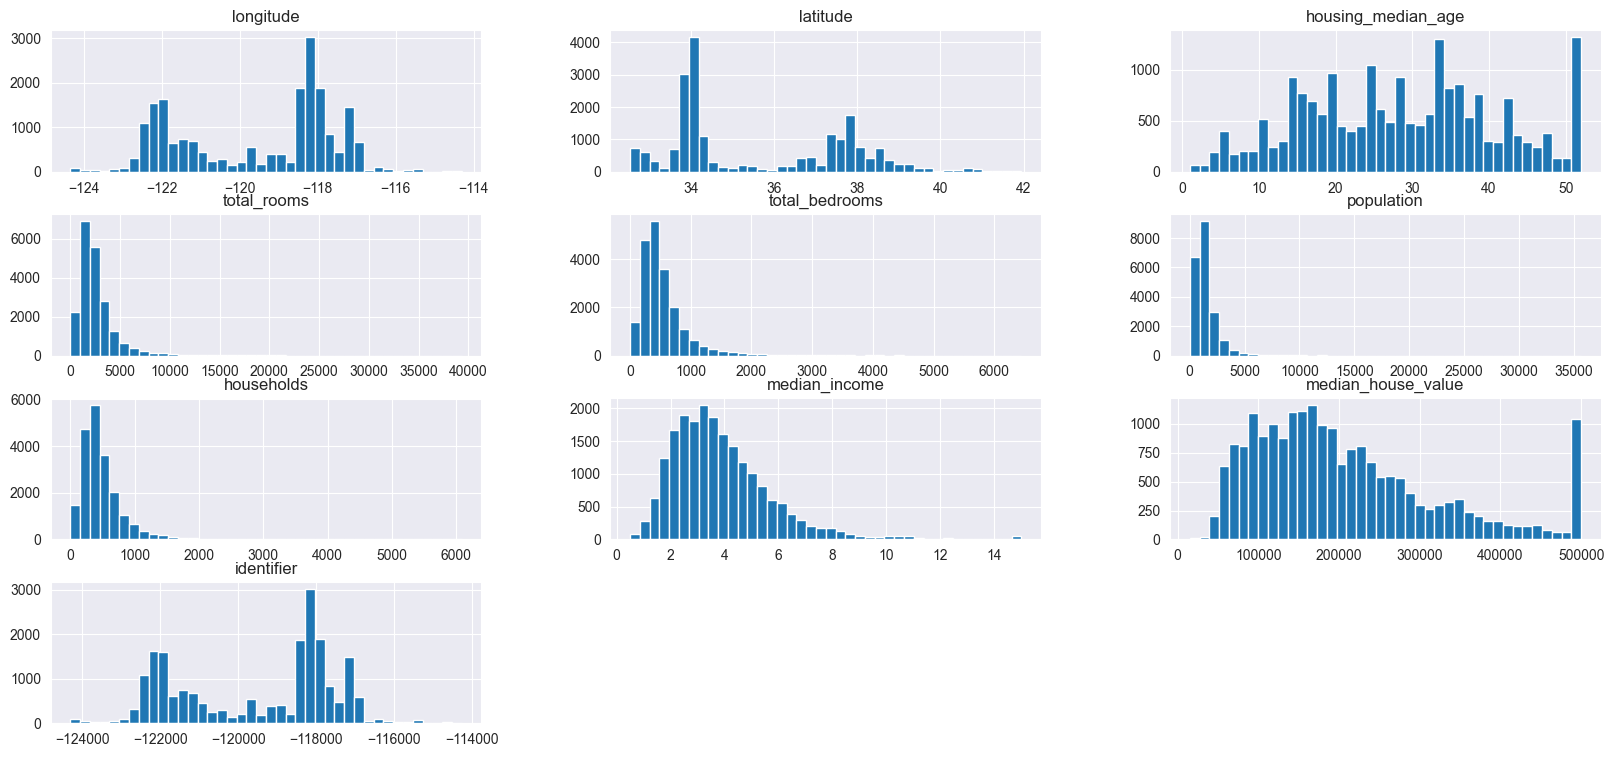

In [26]:

# خود پانداس مت پلات لیب را فراخانی میکنه 
df.hist(bins=40, figsize=(20,9))

In [27]:
df["median_house_value"].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
34200.0       1
46200.0       1
352000.0      1
307900.0      1
385200.0      1
Name: count, Length: 3842, dtype: int64

"""
# نکته مهم
# ستون های تک که اخر بعضی نمودارها مثل مدین هوس ولیو وجود دارد
     این عجیبه
     یعنی روی مثلا 500 هزار دلار یه پیک میبینیم 
     در اصل اومده مقادیر که از یک جایی به بعد کم میشده را قطع کردیم 
     و همه اعداد بزرگتر از 500 هزار دلار را را روی 500هزار دلار گذاشته و جمع کرده
     اما این مقدار اثر میگذاره در حالیکه این تارگت ما است.
    نمیتونیم مدلی بنویسیم که برای خانه های بیشتر از 500 هزار دلار نمیتونه پیش بینی انجام بده
    بنابراین باید 500هزار دلار را حذف کنیم تا در پیش بینی مدل اثر نگذاره
"""


---
 # جلوگیری از سمپلینگ بایاس
 #### راه حل: طبقه بندی نمونه
 
     
     #### روش:
     ####  الف. روی نمونه خودمان طبقه بندی انجام دهیم 
    #### و ب. سپس تست و ترین را مجدد این بار برای کتگوری ای که ایجاد کردیم از هم جدا میکنیم
    #### و ج. حذف ستونی که برای طبقه بندی ایجاد کرده بودیم


####  الف. روی نمونه خودمان طبقه بندی انجام دهیم

In [28]:
# 
df["median_house_value_categories"]=pd.cut(df["median_house_value"],
       bins=[0.0,100000.,150000.,200000.,250000.,500001.],
       labels=[1,2,3,4,5])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_house_value_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,5
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57,1


In [29]:
df["median_house_value_categories"].value_counts()
#  کتگوری را بر اساس ماکسیمم مرتب میکنه

median_house_value_categories
5    5782
3    4311
2    3962
1    3658
4    2927
Name: count, dtype: int64

<Axes: xlabel='median_house_value_categories'>

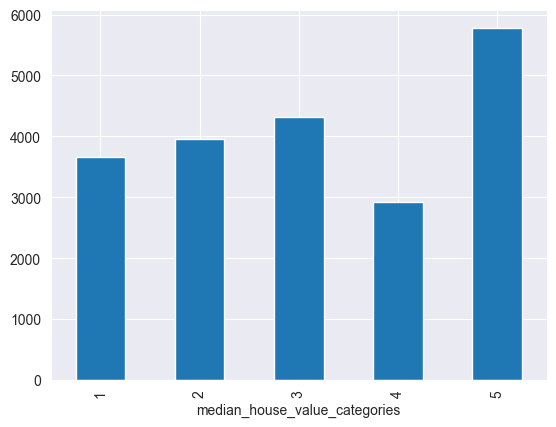

In [30]:
df["median_house_value_categories"].value_counts().sort_index().plot.bar(grid=True)
# عبارت sort_index() باعث میشه که دیگه بر اساس ماکسیمم نشان نده و براساس اندیس نشان دهد

In [31]:
# پیدا کردن مقدار Nan در y
print(str_train_set['median_house_value'].isnull().sum())
# اگر خروجی این کد عددی بزرگتر از 0 باشد، به این معنی است که ستون median_house_value در مجموعه داده آموزشی شما حاوی مقادیر NaN است
# وقتی شما متد .sum() را روی یک سری (Series) بولی اعمال می‌کنید، پایتون به طور خودکار مقادیر True را به 1 و مقادیر False را به 0 تبدیل می‌کند. سپس، این مقادیر 0 و 1 با هم جمع می‌شوند.

NameError: name 'str_train_set' is not defined

In [ ]:
# پیدا کردن مقدار Nan در X
print(str_train_set.isnull().sum())

In [ ]:
# جایگزین NaN با صفر در ترین  و تست
train_set['total_bedrooms'].fillna(0)
test_set['total_bedrooms'].fillna(0)


# # محاسبه میانه از مجموعه آموزش و جایگزین NaN با میانه در تست و ترین 
# median_bedrooms_train = train_set['total_bedrooms'].median()
# train_set['total_bedrooms'].fillna(median_bedrooms_train)
# test_set['total_bedrooms'].fillna(median_bedrooms_train)
# 
# # اگر می‌خواهید از میانگین استفاده کنید، به جای .median() از .mean() استفاده کنید
# mean_bedrooms_train = train_set['total_bedrooms'].mean()
# train_set['total_bedrooms'].fillna(mean_bedrooms_train)
# test_set['total_bedrooms'].fillna(mean_bedrooms_train)


# و ب.  تست و ترین را برای کتگوری مجددا از هم جدا میکنیم


In [ ]:
str_train_set, str_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["median_house_value_categories"],
                                               random_state=40)
# df  همان X ما و stratify همان ستون ما است 
#  که مقدار stratify را برابر با ستونی قرار میدهیم که رووش کتگوری ایجاد کردیم

In [ ]:
str_train_set["median_house_value_categories"].value_counts()/len(str_train_set)

"""
بیایید مرحله به مرحله بررسی کنیم:

    str_train_set["median_house_value_categories"].value_counts(): این قسمت از کد تعداد ردیف‌های مربوط به هر دسته منحصر به فرد در ستون median_house_value_categories را در مجموعه آموزش شمارش می‌کند. نتیجه یک سری (Series) است که در آن اندیس‌ها نام دسته‌ها و مقادیر تعداد نمونه‌های مربوط به هر دسته هستند.

    / len(str_train_set): این قسمت از کد نتیجه value_counts() را بر تعداد کل نمونه‌های موجود در مجموعه آموزش (len(str_train_set)) تقسیم می‌کند. این تقسیم باعث می‌شود که تعداد نمونه‌های هر دسته به یک نسبت یا درصد تبدیل شود.

مثال:

فرض کنید در مجموعه آموزش (str_train_set) 1000 نمونه وجود دارد و ستون median_house_value_categories به صورت زیر است:

    دسته 1: 200 نمونه
    دسته 2: 300 نمونه
    دسته 3: 250 نمونه
    دسته 4: 150 نمونه
    دسته 5: 100 نمونه

در این صورت:

    str_train_set["median_house_value_categories"].value_counts() نتیجه‌ای مشابه زیر خواهد داشت:

    1    200
    2    300
    3    250
    4    150
    5    100
    Name: median_house_value_categories, dtype: int64

    len(str_train_set) برابر با 1000 خواهد بود.

    فرمول str_train_set["median_house_value_categories"].value_counts()/len(str_train_set) نتایج زیر را به دست خواهد داد:

    1    0.20
    2    0.30
    3    0.25
    4    0.15
    5    0.10
    Name: median_house_value_categories, dtype: float64

    این نشان می‌دهد که:
        20% از نمونه‌های مجموعه آموزش در دسته 1 قرار دارند.
        30% از نمونه‌های مجموعه آموزش در دسته 2 قرار دارند.
        25% از نمونه‌های مجموعه آموزش در دسته 3 قرار دارند.
        15% از نمونه‌های مجموعه آموزش در دسته 4 قرار دارند.
        10% از نمونه‌های مجموعه آموزش در دسته 5 قرار دارند.

##### هدف از استفاده از این فرمول:

 ##### این فرمول معمولاً برای این موضوع استفاده می‌شود که آیا توزیع دسته‌ها در مجموعه آموزش با توزیع دسته‌ها در دیتافریم اصلی یا مجموعه آزمایش مطابقت دارد یا خیر.
  ##### این امر به ویژه زمانی مهم است که از روش stratify در train_test_split استفاده می‌کنید، 
 ##### زیرا هدف stratify این است که اطمینان حاصل شود که نسبت دسته‌ها در مجموعه‌های آموزش و آزمایش مشابه نسبت آن‌ها در دیتافریم اصلی است.
"""

# ج. حذف ستونی که برای طبقه بندی ایجاد کرده بودیم


In [ ]:
str_train_set = str_train_set.drop("median_house_value_categories", axis=1)
# axis=1 یعنی ستون را در نظر بگیر
str_test_set = str_test_set.drop("median_house_value_categories", axis=1)

In [ ]:
str_train_set

---
# Visualize

In [ ]:
train = str_train_set

In [32]:
ax = sns.scatterplot(data=train,
                    x="longitude",
                    y="latitude",
                    size="population",
                    alpha=0.2,
                    hue="median_house_value")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

NameError: name 'train' is not defined

---
# Correlations

In [33]:
train.corr()["median_house_value"]

NameError: name 'train' is not defined

In [34]:
sns.scatterplot(data=train,
                x="median_income",
                y="median_house_value",
                alpha=0.2)

NameError: name 'train' is not defined

# Attribute combinations

In [35]:
train["rooms_per_house"] = train["total_rooms"]/train["households"]
train["bedrooms_ratio"] = train["total_bedrooms"]/train["total_rooms"]
train["people_per_house"] = train["population"]/train["households"]
train

NameError: name 'train' is not defined

In [36]:
train.corr()["median_house_value"]

NameError: name 'train' is not defined

# Prepare Data

In [37]:
train_features = train.drop("median_house_value", axis=1)
train_target = train["median_house_value"]
train_target

NameError: name 'train' is not defined

## Data cleaning

In [38]:
train_features.info()

NameError: name 'train_features' is not defined

In [39]:
# remove rows with NA values
train_features.dropna(subset=["total_bedrooms"]).info()

NameError: name 'train_features' is not defined

In [40]:
# train_features_with_imputed_na_values
total_bedrooms_median = train_features["total_bedrooms"].median()
train_features["total_bedrooms"] = train_features["total_bedrooms"].fillna(total_bedrooms_median)

NameError: name 'train_features' is not defined

In [41]:
train_features.info()

NameError: name 'train_features' is not defined

In [42]:
train_features["bedrooms_ratio"] = train_features["total_bedrooms"]/train_features["total_rooms"]

NameError: name 'train_features' is not defined

In [43]:
train_features.info()

NameError: name 'train_features' is not defined

In [44]:
# sklearn impute

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
simple_imputer = SimpleImputer(strategy="median")

In [47]:
train_features.info()

NameError: name 'train_features' is not defined

In [48]:
train_features_numeric = train_features.select_dtypes(include=[np.number])
train_features_numeric.info()

NameError: name 'train_features' is not defined

In [49]:
simple_imputer.fit(train_features_numeric)

NameError: name 'train_features_numeric' is not defined

In [50]:
simple_imputer.statistics_

AttributeError: 'SimpleImputer' object has no attribute 'statistics_'

In [51]:
simple_imputer.transform(train_features_numeric).shape

NameError: name 'train_features_numeric' is not defined

In [52]:
train_features_numeric = pd.DataFrame(simple_imputer.transform(train_features_numeric),
                                      columns = train_features_numeric.columns,
                                      index = train_features_numeric.index)

NameError: name 'train_features_numeric' is not defined

In [53]:
train_features_numeric

NameError: name 'train_features_numeric' is not defined

In [54]:
# Consistency
## estimator 
## transformer
## predictors

# Inspection

# Composition

In [55]:
# categorical features
train_features[["ocean_proximity"]].value_counts()

NameError: name 'train_features' is not defined

In [56]:
train_features_categorical = train_features[["ocean_proximity"]]

NameError: name 'train_features' is not defined

In [57]:
from sklearn.preprocessing import OrdinalEncoder

In [58]:
oe = OrdinalEncoder()
ocean_proximity_index = oe.fit_transform(train_features_categorical)
ocean_proximity_index

NameError: name 'train_features_categorical' is not defined

In [59]:
train_features_categorical

NameError: name 'train_features_categorical' is not defined

In [60]:
oe.categories_

AttributeError: 'OrdinalEncoder' object has no attribute 'categories_'

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
ohe = OneHotEncoder()
ocean_proximity_ohe = ohe.fit_transform(train_features_categorical)

NameError: name 'train_features_categorical' is not defined

In [63]:
ocean_proximity_ohe.toarray()

NameError: name 'ocean_proximity_ohe' is not defined

In [64]:
ohe.categories_

AttributeError: 'OneHotEncoder' object has no attribute 'categories_'

In [65]:
train_features_categorical_ohe = pd.DataFrame(ocean_proximity_ohe.toarray(),
                                              columns=ohe.get_feature_names_out())

NameError: name 'ocean_proximity_ohe' is not defined

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
mms = MinMaxScaler(feature_range=(-1, 1))

In [68]:
mms.fit_transform(train_features_numeric)

NameError: name 'train_features_numeric' is not defined

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
ss = StandardScaler()

In [71]:
ss.fit_transform(train_features_numeric)

NameError: name 'train_features_numeric' is not defined

In [72]:
train_features_numeric["total_rooms"].hist(bins=30)

NameError: name 'train_features_numeric' is not defined

In [73]:
train_features_numeric["total_rooms"].apply(np.log).hist(bins=30)

NameError: name 'train_features_numeric' is not defined

In [74]:
from sklearn.metrics.pairwise import rbf_kernel

In [75]:
rbf_kernel(train_features_numeric[["housing_median_age"]], [[35]], gamma=0.1)

NameError: name 'train_features_numeric' is not defined

NameError: name 'train_features_numeric' is not defined

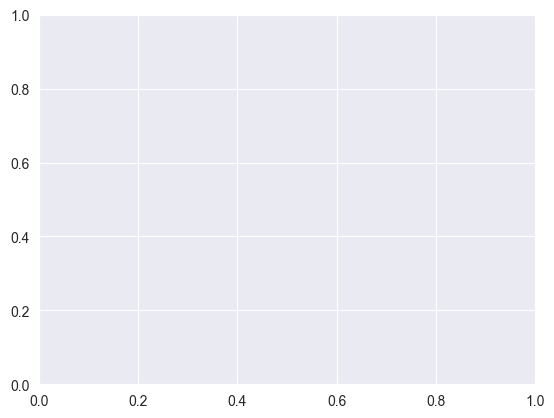

In [76]:
fig, ax = plt.subplots()
ax.hist(train_features_numeric["housing_median_age"], bins=30)

hosing_ages = np.linspace(train_features_numeric["housing_median_age"].min(),
                          train_features_numeric["housing_median_age"].max(),
                          1000).reshape(-1, 1)

rbf1 = rbf_kernel(hosing_ages, [[35]], gamma=0.1)
rbf2 = rbf_kernel(hosing_ages, [[35]], gamma=0.2)

ax2 = ax.twinx()
ax2.plot(hosing_ages, rbf1, color="black", lw=2)
ax2.plot(hosing_ages, rbf2, color="black", lw=2, ls="--")

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
ss = StandardScaler()
target_values = ss.fit_transform(train_target.to_frame())
target_values

NameError: name 'train_target' is not defined

In [79]:
model = LinearRegression()
model.fit(train_features_numeric[["median_income"]],
          target_values)

NameError: name 'train_features_numeric' is not defined

In [80]:
predictions = model.predict(train_features_numeric[["median_income"]].iloc[:5])

NameError: name 'train_features_numeric' is not defined

In [81]:
ss.inverse_transform(predictions)

NameError: name 'predictions' is not defined

In [82]:
from sklearn.compose import TransformedTargetRegressor

In [83]:
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

In [84]:
model.fit(train_features_numeric[["median_income"]],
          train_target.to_frame())

NameError: name 'train_features_numeric' is not defined

In [85]:
model.predict(train_features_numeric[["median_income"]].iloc[:5])

NameError: name 'train_features_numeric' is not defined

In [86]:
from sklearn.preprocessing import FunctionTransformer

In [87]:
logarithmic_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
logarithmic_transformer.transform(train_features_numeric[["population"]])

NameError: name 'train_features_numeric' is not defined

In [88]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args={"Y":[[35.0]],
                                               "gamma":0.1})

In [89]:
rbf_transformer.transform(train_features_numeric[["housing_median_age"]])

NameError: name 'train_features_numeric' is not defined

In [90]:
# duck typing

In [91]:
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.base import BaseEstimator, TransformerMixin

In [92]:
class CustomStandardScaler(BaseEstimator, TransformerMixin):

  def __init__(self, hp=0):
    self.hp = hp

  def fit(self, X, y=None):
    X = check_array(X)
    self.mean_of_X = X.mean(axis=0)
    self.std_of_X = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    check_is_fitted(self)
    assert self.n_features_in_ == X.shape[1]
    X = X - self.mean_of_X
    return X / self.std_of_X

In [93]:
css = CustomStandardScaler()
css.fit_transform(train_features_numeric)

NameError: name 'train_features_numeric' is not defined

In [94]:
# pipeline

In [95]:
from sklearn.pipeline import Pipeline, make_pipeline

In [96]:
numerical_features_pipeline = Pipeline([
    ("medianImputer", SimpleImputer(strategy="median")),
    ("minMaxScaler", MinMaxScaler())
])

In [97]:
make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler()
)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('minmaxscaler', MinMaxScaler())])

In [98]:
numerical_features_pipeline.fit_transform(train_features_numeric)

NameError: name 'train_features_numeric' is not defined

In [99]:
from sklearn.compose import ColumnTransformer

In [100]:
train_features.columns

NameError: name 'train_features' is not defined

In [101]:
numerical_features = list(train_features.columns)
numerical_features.remove("ocean_proximity")
numerical_features

NameError: name 'train_features' is not defined

In [102]:
categorical_features = ["ocean_proximity"]

In [103]:
numerical_features_pipeline = Pipeline([
    ("medianImputer", SimpleImputer(strategy="median")),
    ("minMaxScaler", MinMaxScaler())
])

In [104]:
categorical_features_pipeline = Pipeline([
    ("mfImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

In [105]:
total_transformation = ColumnTransformer([
    ("numerical", numerical_features_pipeline, numerical_features),
    ("categorical", categorical_features_pipeline, categorical_features)
])

NameError: name 'numerical_features' is not defined

In [106]:
"drop"
"passthrough"

'passthrough'

In [107]:
total_transformation.fit_transform(train_features)

NameError: name 'total_transformation' is not defined

In [108]:
total_transformation.get_feature_names_out()

NameError: name 'total_transformation' is not defined

In [109]:
# all of the transformations

In [110]:
train_data, test_data = train_test_split(df,
                                         test_size=0.2,
                                         stratify=df["median_income_categories"],
                                         random_state=40)

KeyError: 'median_income_categories'

In [ ]:
train_data = train_data.drop(columns="median_income_categories")
test_data = test_data.drop(columns="median_income_categories")

In [ ]:
train_features = train_data.drop(columns="median_house_value")
train_target = train_data["median_house_value"]

test_features = test_data.drop(columns="median_house_value")
test_target = test_data["median_house_value"]

In [ ]:
train_features

In [ ]:
heavy_tail_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

In [111]:
categorical_features_pipeline = Pipeline([
    ("mfImputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder())
])

In [112]:
housing_median_age_rbf_transformer = FunctionTransformer(
    rbf_kernel,
    feature_names_out="one-to-one", 
    kw_args={"Y":[[35.0]],"gamma":0.1}
    )

In [113]:
default_numerical_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [114]:
def ratio_of_columns(X):
  return X[:, [0]] / X[:, [1]]

def ratio_of_columns_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_of_columns_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(ratio_of_columns,
                          feature_names_out=ratio_of_columns_name),
      StandardScaler()
      
  )

In [115]:
all_transformations = ColumnTransformer([
    ("bedrooms", ratio_of_columns_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_of_columns_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_of_columns_pipeline(), ["population", "households"]),
    ("log", heavy_tail_pipeline, ["total_bedrooms", "total_rooms",
                                  "population", "households", "median_income"]),
    ("rbf", housing_median_age_rbf_transformer, ["housing_median_age"]),
    ("cat", categorical_features_pipeline, ["ocean_proximity"])
    
],
remainder=default_numerical_pipeline)

NameError: name 'heavy_tail_pipeline' is not defined

In [116]:
train_features_transformed = all_transformations.fit_transform(train_features)

NameError: name 'all_transformations' is not defined

In [117]:
train_features_transformed.shape

NameError: name 'train_features_transformed' is not defined

In [118]:
all_transformations.get_feature_names_out()

NameError: name 'all_transformations' is not defined

In [119]:
train_features_transformed

NameError: name 'train_features_transformed' is not defined

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
linear_regression_pipeline = make_pipeline(all_transformations, 
                                           LinearRegression())

NameError: name 'all_transformations' is not defined

In [122]:
linear_regression_pipeline.fit(train_features,
                               train_target)

NameError: name 'linear_regression_pipeline' is not defined

In [123]:
house_value_prediction = linear_regression_pipeline.predict(train_features)

NameError: name 'linear_regression_pipeline' is not defined

In [124]:
house_value_prediction

NameError: name 'house_value_prediction' is not defined

In [125]:
train_target.values

NameError: name 'train_target' is not defined

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [127]:
mean_absolute_error(train_target.values, house_value_prediction)

NameError: name 'train_target' is not defined

In [128]:
mean_squared_error(train_target.values, house_value_prediction,
                   squared=False)

NameError: name 'train_target' is not defined

In [129]:
r2_score(train_target.values, house_value_prediction)

NameError: name 'train_target' is not defined

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
dt_regression_pipeline = make_pipeline(all_transformations, 
                                       DecisionTreeRegressor())

NameError: name 'all_transformations' is not defined

In [ ]:
dt_regression_pipeline.fit(train_features,
                           train_target)

In [132]:
mean_absolute_error(train_target.values,
                    dt_regression_pipeline.predict(train_features))

NameError: name 'train_target' is not defined

In [133]:
r2_score(train_target.values,
         dt_regression_pipeline.predict(train_features))

NameError: name 'train_target' is not defined

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
dt_mae = -cross_val_score(dt_regression_pipeline,
                          train_features,
                          train_target,
                          scoring="neg_mean_absolute_error",
                          cv=5)

NameError: name 'dt_regression_pipeline' is not defined

In [136]:
pd.Series(dt_mae).describe()

NameError: name 'dt_mae' is not defined

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
#method1

In [139]:
param_grid = {"max_depth":[5, 10, 15]}

In [140]:
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid,
                  scoring="neg_mean_absolute_error",
                  cv=5)

In [141]:
gs.fit(train_features_transformed, train_target)

NameError: name 'train_features_transformed' is not defined

In [142]:
gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [143]:
#method2

In [144]:
dt_regression_pipeline = Pipeline([
    ("transformation", all_transformations), 
    ("dtr", DecisionTreeRegressor())
    ])

NameError: name 'all_transformations' is not defined

In [145]:
param_grid = {"transformation__rbf__kw_args":[{"Y":[[35.0]],"gamma":0.1},
                                              {"Y":[[35.0]],"gamma":0.2}],
              "dtr__max_depth":[5, 10, 15]}

In [146]:
gs = GridSearchCV(dt_regression_pipeline,
                  param_grid,
                  scoring="neg_mean_absolute_error",
                  cv=5)

NameError: name 'dt_regression_pipeline' is not defined

In [147]:
gs.fit(train_features, train_target)

NameError: name 'train_features' is not defined

In [148]:
gs.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [149]:
pd.DataFrame(gs.cv_results_).sort_values(by="mean_test_score",
                                         ascending=False)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [150]:
from scipy.stats import randint

In [151]:
randint(low=5, high=100)

In [152]:
housing_model = gs.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [153]:
housing_model["dtr"].feature_importances_.round(3)

NameError: name 'housing_model' is not defined

In [154]:
sorted(zip(housing_model["dtr"].feature_importances_.round(3),
       housing_model["transformation"].get_feature_names_out()),
       reverse=True)

NameError: name 'housing_model' is not defined

In [155]:
mean_squared_error(test_target,
                   housing_model.predict(test_features),
                   squared=False)

NameError: name 'test_target' is not defined

In [156]:
from scipy import stats

In [157]:
ci = 0.95

In [158]:
se = (test_target.values - housing_model.predict(test_features))**2

NameError: name 'test_target' is not defined

In [159]:
np.sqrt(stats.t.interval(ci, 
                 len(se)-1,
                 loc=np.mean(se),
                 scale=stats.sem(se)))

NameError: name 'se' is not defined

In [160]:
import joblib

In [161]:
joblib.dump(housing_model, "housing_model.pkl")

NameError: name 'housing_model' is not defined

In [162]:
housing_model_loaded = joblib.load("housing_model.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'housing_model.pkl'

In [163]:
housing_model_loaded

NameError: name 'housing_model_loaded' is not defined

In [164]:
# ML operations (MLOps)